# Lab 3: Training Deep Recurrent Neural Network


## Lab Instruction - Emojify

In this lab, you will learn to train a deep Recurrent neural network using Keras library with Tensorflow backend. Your task is to do the sentimental analysis which you will predict the emoji that represent the emotion in each sentence.


In [1]:
# Import require library
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence

In [2]:
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [3]:
# import data
df = pd.read_csv('emoji_data.csv')
df.describe()

,emoji
count,7480.000000
mean,2.977273
std,1.999269
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [4]:
df.head()

,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [5]:
x = df['sentence'].values
y = df['emoji'].values

In [6]:
    x[0]

'During the period of falling in love, each time that we met and especially when we had not met for a long time.'

In [7]:
y[0]

0

### Split train test

In [8]:
# Split train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)
# Split train validate
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)

Text(0.5, 1.0, 'y val')

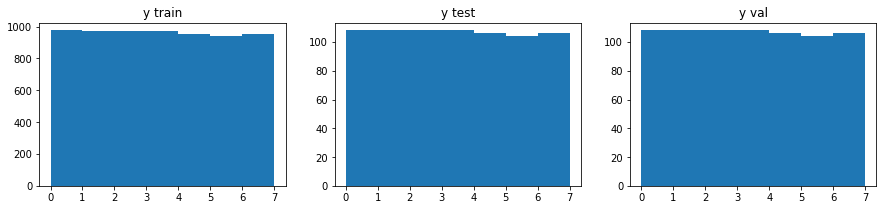

In [9]:
# Plot target distribution
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val,bins=bins)
ax[2].set_title('y val')

### Preprocess data: Tokenizer & Padding

In [10]:
# Define parameter
max_word = 5000
maxlen = 20
max_features = 5000

In [11]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_word) #define corpus  to keep maximum number of words 
tokenizer.fit_on_texts(x_train)

In [12]:
tokenizer.word_index

{'i': 1,
 'the': 2,
 'a': 3,
 'to': 4,
 'my': 5,
 'and': 6,
 'was': 7,
 'when': 8,
 'of': 9,
 'in': 10,
 'had': 11,
 'me': 12,
 'that': 13,
 'for': 14,
 'not': 15,
 'with': 16,
 'it': 17,
 'at': 18,
 'on': 19,
 'he': 20,
 'very': 21,
 'friend': 22,
 'felt': 23,
 'an': 24,
 'she': 25,
 'her': 26,
 'we': 27,
 'one': 28,
 'as': 29,
 'about': 30,
 'this': 31,
 'from': 32,
 'after': 33,
 'time': 34,
 'by': 35,
 'were': 36,
 'did': 37,
 'but': 38,
 'out': 39,
 'him': 40,
 'who': 41,
 'because': 42,
 'his': 43,
 'been': 44,
 'got': 45,
 'have': 46,
 'some': 47,
 'which': 48,
 'home': 49,
 'would': 50,
 'friends': 51,
 'up': 52,
 'told': 53,
 'so': 54,
 'day': 55,
 'mother': 56,
 'they': 57,
 'be': 58,
 'do': 59,
 'school': 60,
 'people': 61,
 'went': 62,
 'person': 63,
 'there': 64,
 'saw': 65,
 'our': 66,
 'first': 67,
 'is': 68,
 'could': 69,
 'came': 70,
 'night': 71,
 'father': 72,
 'go': 73,
 'all': 74,
 "didn't": 75,
 'made': 76,
 'mine': 77,
 'girl': 78,
 'having': 79,
 'back': 80,
 'o

In [13]:
tokenizer.num_words

5000

In [14]:
# Preprocess data function
def preprocess_fn(data):
    sequeces = tokenizer.texts_to_sequences(data)
    padding_sequences = sequence.pad_sequences(sequeces,maxlen = maxlen)
    
    return padding_sequences,sequeces

In [15]:
# Preprocess data
x_train,sequeces_x_train =  preprocess_fn(x_train)
x_val,sequeces_x_val = preprocess_fn(x_val)
x_test,sequeces_x_test = preprocess_fn(x_test)

In [16]:
x_train

array([[ 338,    4,  719, ...,    6, 1529,   93],
       [   0,    0,    0, ...,  408,    4,   12],
       [   4,  345,    3, ...,   11,  172,  173],
       ...,
       [   0,    0,    0, ...,  127,    5,   22],
       [   0,    0,    0, ...,   86, 1403,   12],
       [  14,   40,    4, ...,  981,    4,   12]])

In [17]:
x_train.shape

(6732, 20)

In [18]:
y_train

array([3, 4, 6, ..., 3, 4, 1], dtype=int64)

In [19]:
y_train.shape

(6732,)

In [20]:
sequeces_x_train

[[188,
  9,
  3,
  1406,
  3199,
  27,
  11,
  4,
  221,
  17,
  107,
  42,
  5,
  100,
  240,
  2584,
  4,
  17,
  27,
  202,
  17,
  4,
  3,
  98,
  41,
  402,
  784,
  6,
  1528,
  9,
  81,
  784,
  14,
  338,
  4,
  719,
  27,
  62,
  4,
  345,
  66,
  3199,
  17,
  7,
  314,
  561,
  35,
  2,
  81,
  4453,
  6,
  1529,
  93],
 [1, 46, 23, 31, 161, 8, 3, 63, 164, 1, 661, 6, 720, 408, 4, 12],
 [304,
  18,
  321,
  87,
  721,
  4,
  345,
  3,
  96,
  456,
  10,
  242,
  33,
  26,
  188,
  1,
  23,
  21,
  111,
  6,
  1204,
  1,
  11,
  172,
  173],
 [1,
  688,
  4,
  5,
  56,
  19,
  2,
  507,
  25,
  11,
  1663,
  508,
  6,
  7,
  382,
  4,
  58,
  2162,
  1,
  374,
  4,
  578,
  26,
  2,
  633,
  9,
  2,
  579,
  6,
  133,
  130,
  2163,
  66,
  562,
  25,
  202,
  12,
  2,
  633,
  10,
  722],
 [8,
  4454,
  16,
  3200,
  457,
  1664,
  114,
  5,
  121,
  6,
  1882,
  12,
  4,
  221,
  88,
  152,
  103,
  383,
  188],
 [45, 220, 67, 1142, 143],
 [8,
  1,
  458,
  13,
  1,
  11,
  

### Build a model with word embedding

In [21]:
# Define model
rnn =models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))

rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(7,activation='softmax'))

In [22]:
# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [23]:
# Show model structure
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 164,647
Trainable params: 164,647
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit model
his =  rnn.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_val,y_val))

Epoch 1/5
106/106 [==============================] - 2s 7ms/step - loss: 1.9327 - acc: 0.1777 - val_loss: 1.9066 - val_acc: 0.2112
Epoch 2/5
106/106 [==============================] - 1s 6ms/step - loss: 1.7327 - acc: 0.3379 - val_loss: 1.7882 - val_acc: 0.2473
Epoch 3/5
106/106 [==============================] - 1s 8ms/step - loss: 1.4366 - acc: 0.4805 - val_loss: 1.8179 - val_acc: 0.2901
Epoch 4/5
106/106 [==============================] - 1s 6ms/step - loss: 1.1510 - acc: 0.6067 - val_loss: 2.0518 - val_acc: 0.2901
Epoch 5/5
106/106 [==============================] - 1s 6ms/step - loss: 0.8732 - acc: 0.7154 - val_loss: 2.1311 - val_acc: 0.3008


In [25]:
# Plot accuracy and loss over each epochs
fn.show_result(his)

NameError: name 'fn' is not defined

In [ ]:
# Define callbacks


### LSTM

In [ ]:
# Define model
lstm =models.Sequential()
lstm.add(layers.Embedding(max_features,32,input_length=maxlen))

lstm.add(layers.LSTM(32))
lstm.add(layers.Dense(64,activation='elu'))
lstm.add(layers.Dense(7,activation='softmax'))

In [ ]:
# Compile model
lstm.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# Fit model
his2 =  lstm.fit(x_train,y_train,epochs=16,batch_size=32,validation_data=(x_val,y_val))

### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [ ]:
# Preprocess test data
rnn.evaluate(x_test,y_test)

In [ ]:
# Evaluate model with test data

In [ ]:
# Show confusino matrix and prediction report
fn.evaluation_report(rnn,x_test,y_test)

In [ ]:
rnn.save('model1.h5')

In [ ]:
# Preprocess test data
lstm.evaluate(x_test,y_test)

In [ ]:
# Show confusino matrix and prediction report
fn.evaluation_report(lstm,x_test,y_test)

In [ ]:
lstm.save('model2.h5')

# ### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [ ]:
# Define predict function
def predict_emoji(input_text,model):
    
    prepro_input = preprocess_fn([input_text])
    prepro_input = prepro_input[0]
    pred_class = model.predict(prepro_input).argmax(axis =1)
    
    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞']
    
    result = label_to_emoji[int(pred_class)]
    
    print('%s %s'%(input_text,result))

In [ ]:
# Test your model
input_text ='I like this class'
predict_emoji(input_text,rnn)

In [ ]:
# Test your model
input_text = 'I like this class'
predict_emoji(input_text,lstm)

In [ ]:
# Test your model
input_text = 'I dont like this class'
predict_emoji(input_text,lstm)